<a href="https://colab.research.google.com/github/emredeveloper/VeriBilimi-Projeler/blob/main/LSTM-AirlinePassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout


In [122]:
# Air Passengers veri setini yükle
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, usecols=[1], engine='python', skipfooter=3)

# Veriyi numpy array'e dönüştür
data = df.values.astype('float32')

In [123]:
# Veriyi normalize et
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Veriyi LSTM modeline uygun hale getir
time_steps = 12
x, y = create_dataset(data_scaled, data_scaled, time_steps)

In [124]:
# Veriyi eğitim ve test setlerine bölelim
split_ratio = 0.8
split_index = int(split_ratio * len(x))

x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [130]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


# LSTM modelini oluştur
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dropout(0.1))  # Dropout katmanı ekleyin
model.add(Dense(1))

optimizer = Adam(lr=0.01)

model.compile(optimizer=optimizer, loss='mse')

# EarlyStopping callback'ini tanımla
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


3/3 [==============================] - 0s 28ms/step - loss: 8.7905e-04 - val_loss: 0.0119


In [131]:
# Modeli eğit
history = model.fit(x_train, y_train, epochs=300, batch_size=5, validation_split=0.25, callbacks=[early_stopping])

# Modelden tahminleri yap
y_pred_scaled = model.predict(x_test)

# Tahminleri inverse transform yaparak geri çevir
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

Epoch 1/300
16/16 [==============================] - 2s 25ms/step - loss: 0.0398 - val_loss: 0.1262
Epoch 2/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0122 - val_loss: 0.0345
Epoch 3/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0076 - val_loss: 0.0365
Epoch 4/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0068 - val_loss: 0.0355
Epoch 5/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0058 - val_loss: 0.0251
Epoch 6/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0048 - val_loss: 0.0170
Epoch 7/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 0.0137
Epoch 8/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0038 - val_loss: 0.0124
Epoch 9/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0032 - val_loss: 0.0123
Epoch 10/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0124

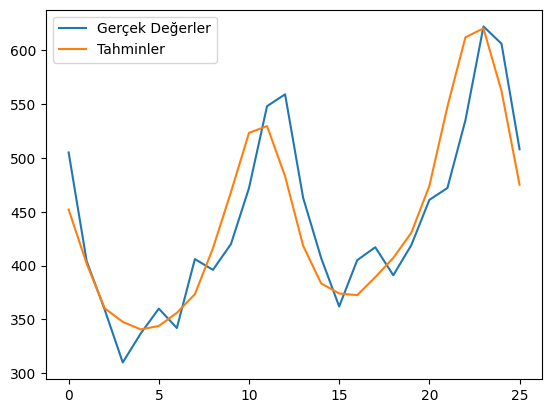

Test loss: 0.005300390534102917


In [127]:
# Tahmin ve gerçek değerleri görüntüle
plt.plot(y_test_actual, label='Gerçek Değerler')
plt.plot(y_pred, label='Tahminler')
plt.legend()
plt.show()

# Modeli değerlendir
loss = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss}')